###                              World Happiness Report Project

####     Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


##### What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.


##### What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 


##### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

#### You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [1]:
# imporing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# loading the dataset
happiness = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
happiness.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [4]:
# checking the dimeansions and the column names
print("Shape :", happiness.shape)
print()
print("Columns :", happiness.columns)


Shape : (158, 12)

Columns : Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [5]:
# checking the summary statistics
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

**The dataset contains 2 string columns(objects) and 10 numerical columns(int and float).**
**Happiness Score is our target variable.**

In [6]:
happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
# checking for null values
happiness.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

**Dataset contains no null value.**

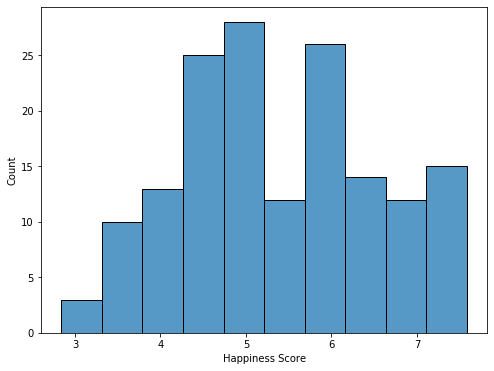

In [8]:
# checking the frequency of happiness score
plt.figure(figsize=(8,6))
sns.histplot(data=happiness, x='Happiness Score', bins=10)
plt.show()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64


Text(0, 0.5, 'Count')

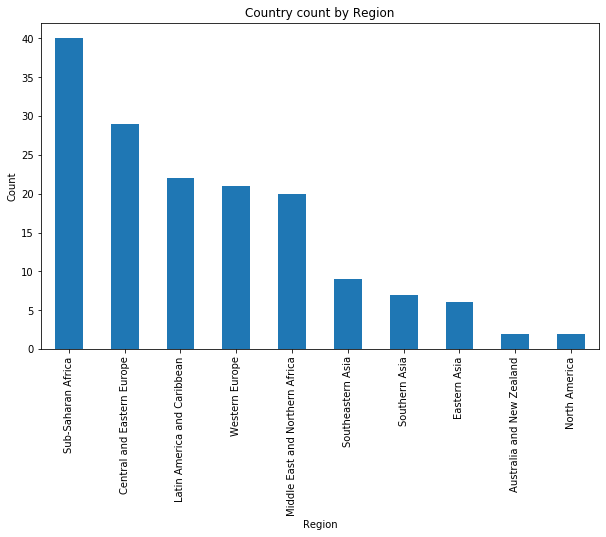

In [9]:
# checking the number of countries belonging to each region
country_count = happiness['Region'].value_counts()
print(country_count)
country_count.plot(kind='bar', figsize=(10,6))
plt.title("Country count by Region")
plt.xlabel('Region')
plt.ylabel("Count")

In [10]:
# mean happiness score for each region
region_mean = happiness.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
region_mean

Region
Australia and New Zealand          7.285000
North America                      7.273000
Western Europe                     6.689619
Latin America and Caribbean        6.144682
Eastern Asia                       5.626167
Middle East and Northern Africa    5.406900
Central and Eastern Europe         5.332931
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Name: Happiness Score, dtype: float64

**Above results show an interesting observation that the numberof countries in a region does not necessarily correlate with the average happiness score.**
**For instance, even though the Sub-Saharan Africa region has the highest number of country(40) in the dataset, their average happiness score is the lowest while the average happiness score of Australia and New Zealand region is the highest with only 2 countries.**

Mean value for Economy (GDP per Capita) in each region -- 

Region
North America                      1.360400
Western Europe                     1.298596
Australia and New Zealand          1.291880
Eastern Asia                       1.151780
Middle East and Northern Africa    1.066973
Central and Eastern Europe         0.942438
Latin America and Caribbean        0.876815
Southeastern Asia                  0.789054
Southern Asia                      0.560486
Sub-Saharan Africa                 0.380473
Name: Economy (GDP per Capita), dtype: float64



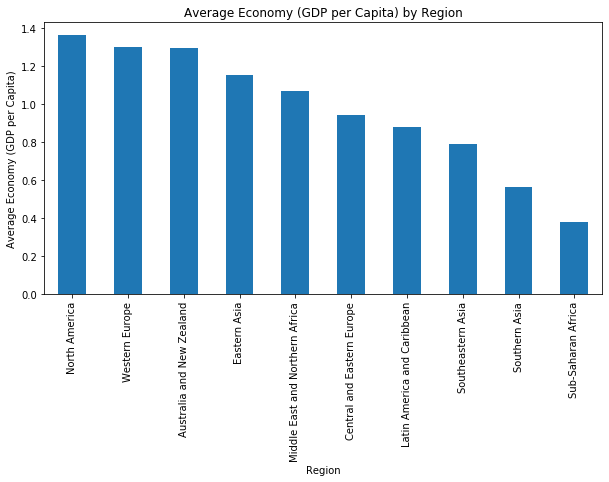

****************************************************************************************************
Mean value for Family in each region -- 

Region
Australia and New Zealand          1.314450
North America                      1.284860
Western Europe                     1.247302
Latin America and Caribbean        1.104720
Eastern Asia                       1.099427
Central and Eastern Europe         1.053042
Southeastern Asia                  0.940468
Middle East and Northern Africa    0.920490
Sub-Saharan Africa                 0.809085
Southern Asia                      0.645321
Name: Family, dtype: float64



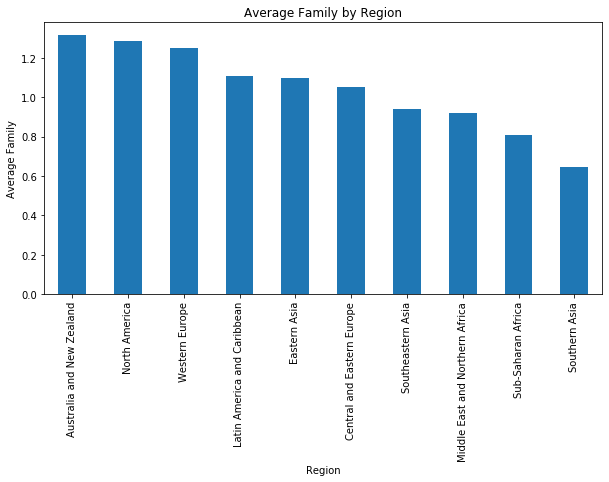

****************************************************************************************************
Mean value for Health (Life Expectancy) in each region -- 

Region
Australia and New Zealand          0.919965
Western Europe                     0.909148
North America                      0.883710
Eastern Asia                       0.877388
Central and Eastern Europe         0.718774
Middle East and Northern Africa    0.705616
Latin America and Caribbean        0.703870
Southeastern Asia                  0.677357
Southern Asia                      0.540830
Sub-Saharan Africa                 0.282332
Name: Health (Life Expectancy), dtype: float64



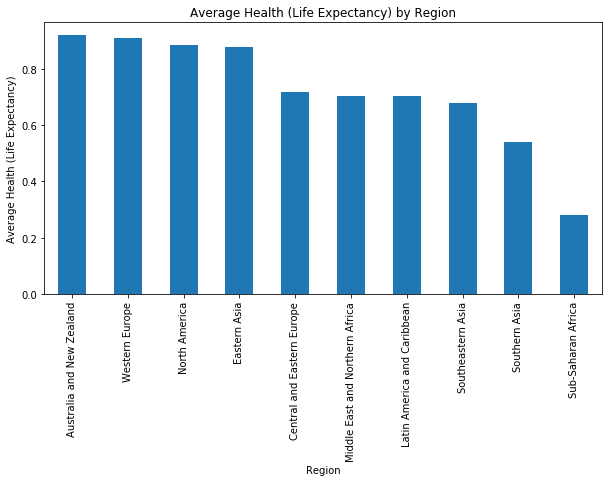

****************************************************************************************************
Mean value for Freedom in each region -- 

Region
Australia and New Zealand          0.645310
North America                      0.589505
Southeastern Asia                  0.557104
Western Europe                     0.549926
Latin America and Caribbean        0.501740
Eastern Asia                       0.462490
Southern Asia                      0.373337
Sub-Saharan Africa                 0.365944
Middle East and Northern Africa    0.361751
Central and Eastern Europe         0.358269
Name: Freedom, dtype: float64



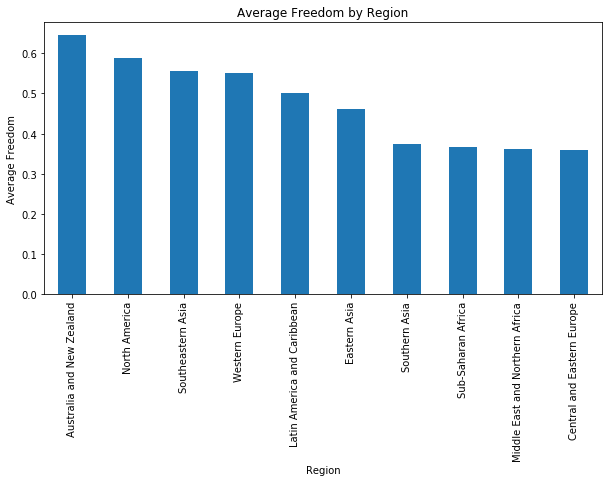

****************************************************************************************************
Mean value for Trust (Government Corruption) in each region -- 

Region
Australia and New Zealand          0.392795
North America                      0.244235
Western Europe                     0.231463
Middle East and Northern Africa    0.181702
Southeastern Asia                  0.151276
Eastern Asia                       0.127695
Sub-Saharan Africa                 0.123878
Latin America and Caribbean        0.117172
Southern Asia                      0.102536
Central and Eastern Europe         0.086674
Name: Trust (Government Corruption), dtype: float64



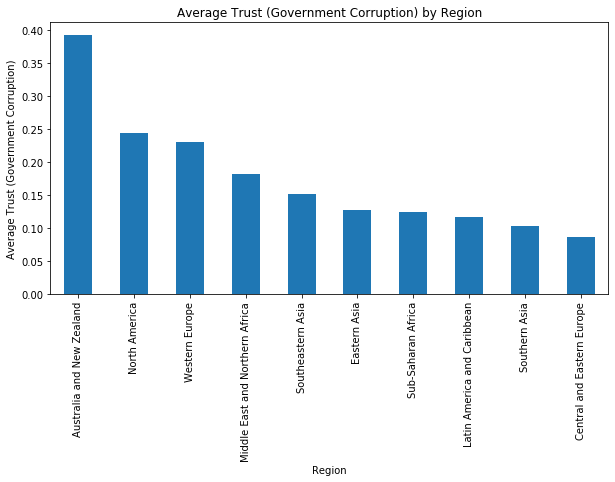

****************************************************************************************************
Mean value for Generosity in each region -- 

Region
Australia and New Zealand          0.455315
North America                      0.429580
Southeastern Asia                  0.419261
Southern Asia                      0.341429
Western Europe                     0.302109
Eastern Asia                       0.225885
Sub-Saharan Africa                 0.221137
Latin America and Caribbean        0.217788
Middle East and Northern Africa    0.190375
Central and Eastern Europe         0.152264
Name: Generosity, dtype: float64



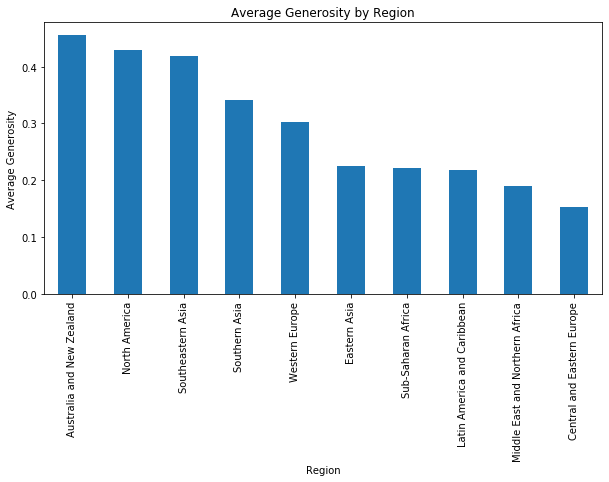

****************************************************************************************************


In [11]:
# calculating mean values for every feature for each region
features = ['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)',
           'Freedom','Trust (Government Corruption)','Generosity']
for feature in features:
    feature_mean = happiness.groupby('Region')[feature].mean().sort_values(ascending=False)
    print(f"Mean value for {feature} in each region -- ")
    print()
    print(feature_mean)
    print()
   
    # Create a bar plot for the current feature
    plt.figure(figsize=(10,5))
    feature_mean.plot(kind='bar')
    plt.title(f"Average {feature} by Region")
    plt.xlabel('Region')
    plt.ylabel(f"Average {feature}")
    plt.xticks(rotation=90)
    plt.show()
    print('*'*100)


**Based on the above results we can say that every feature have different correlation with the happiness score.**
**For instance--**

1. Australian region has the highest average happiness score but it doesnot have the highest value for Ecomony feaure.This indicates that factors other than economy contribute significantly for the highest happiness score in this region.

2. Sub-Saharan African region has the lowest happiness score but does not have the lowest values for Generosity, Trust (Government Corruption), Freedom, Family features. This suggests that these factore may not be the prime factor for the lowest happiness score of the region.

3. Southern Asian region has the lowest value for Family feature.This implies that the quality of social support and family realtionships is relatively weaker in this region and thus impacting the overall happiness score.

4. Central and Eastern Europian region has the lowest values for Generosity, Trust (Government Corruption), Freedom feaures.

**These observations signifies that multiple factors contribute to happiness levels, and their significance can vary across regions.**

In [12]:
# lets drop the country and happiness rank column since they are unnecessary for analysis
happiness = happiness.drop(['Country','Happiness Rank'], axis=1)
happiness.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


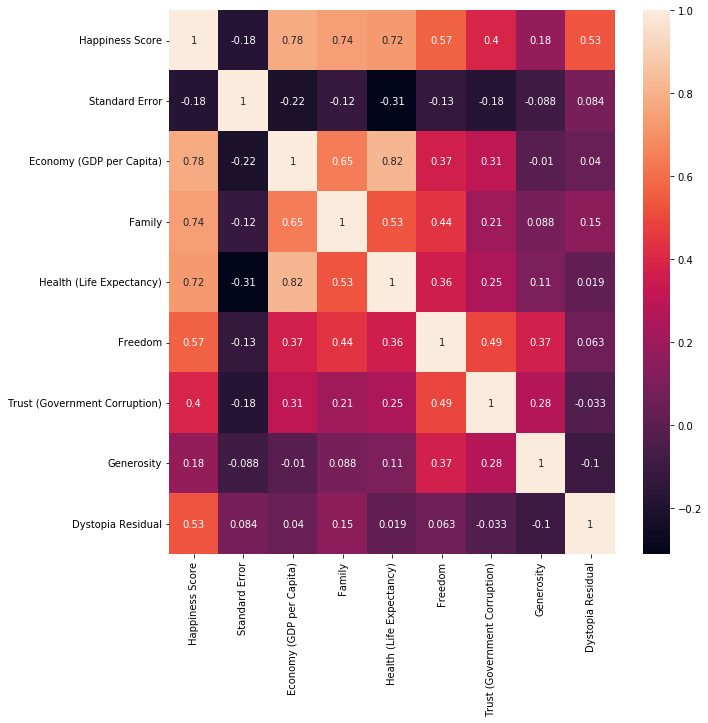

In [13]:
# visualizing the corrleation using the heatmap
plt.figure(figsize = (10,10))
sns.heatmap(happiness.corr(), annot = True)
plt.show()

Every feature is positively correlated to the happiness score except the standard error feature. The order of correlation of features is--

**Economy> Family> Health> Freedom> Dystopia Residual> Trust> Generosity**

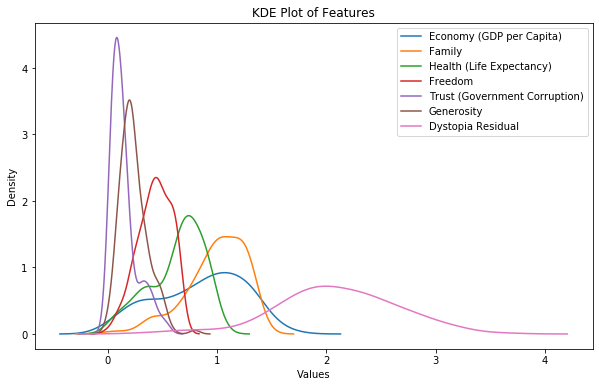

In [14]:
# plotting each feature
features = ['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']

plt.figure(figsize=(10, 6))
for feature in features:
    # Plot the KDE curve for each feature
    sns.kdeplot(data=happiness[feature], label=feature)

plt.xlabel("Values")
plt.title('KDE Plot of Features')
plt.legend()
plt.show()

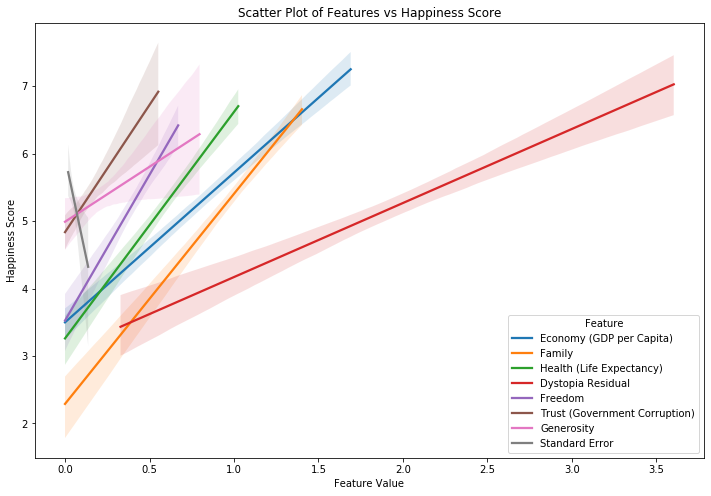

In [15]:
# lets visualize each feature against happiness score
features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Dystopia Residual',
            'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Standard Error']

plt.figure(figsize=(12, 8))
for feature in features:
    # Create a scatter plot for each feature against the happiness score, with region as hue
    sns.regplot(data=happiness, x=feature, y='Happiness Score', label=feature, scatter=False)

plt.xlabel('Feature Value')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot of Features vs Happiness Score')
plt.legend(title='Feature', loc='lower right')
plt.show()

##### Categorizing data into train and test sets

In [16]:
happiness.columns

Index(['Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X=happiness.drop(['Region','Happiness Score'], axis=1)
y=happiness['Happiness Score']

print("X :", X.shape)
print("y :", y.shape)


X : (158, 8)
y : (158,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [19]:
print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)

X_train : (118, 8)
y_train : (118,)
X_test : (40, 8)
y_test : (40,)


In [20]:
# importing libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

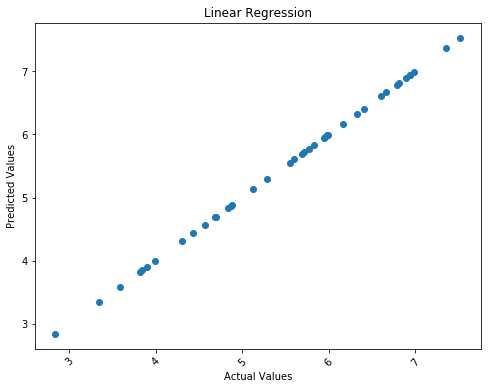

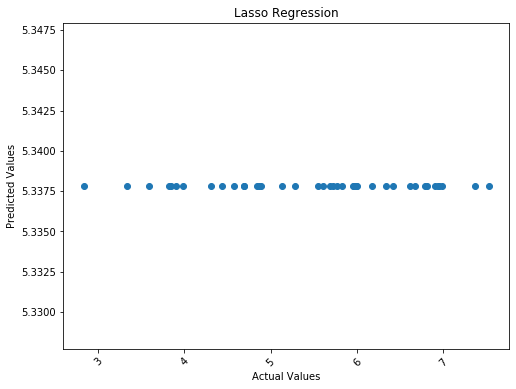

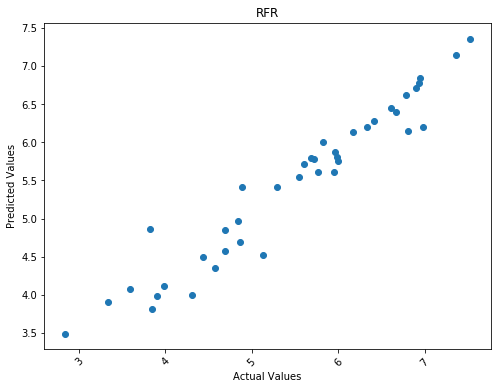

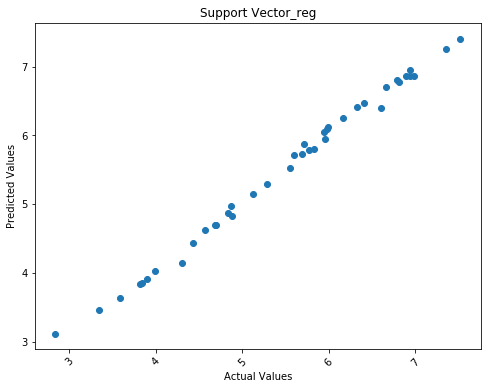

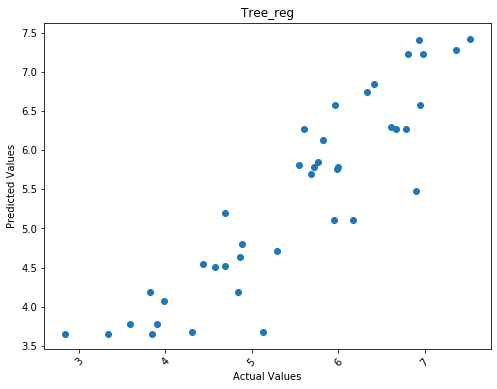

In [28]:
models = [('Linear Regression', LinearRegression()), ('Lasso Regression', Lasso()),
          ('RFR', RandomForestRegressor()),('Support Vector_reg', SVR()),
          ('Tree_reg', DecisionTreeRegressor())]

predictions = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append((name, y_pred))
    
# Plotting the predicted vs actual values
for name, y_pred in predictions:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(name)
    plt.xticks(rotation=45)
    plt.show()

In [29]:
metrics = []
for name, y_pred in predictions:
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append((name, r2, mse, rmse, mae))

# Creating metrics dataframe
metrics_df = pd.DataFrame(metrics, columns=['Model_name', 'R2_score', 'Mean_Squared_Error',
                                            'Root_Mean_Squared_Error', 'Mean_Absolute_Error'])

metrics_df

,Model_name,R2_score,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error
0,Linear Regression,1.000000,7.414563e-08,0.000272,0.000236
1,Lasso Regression,-0.015769,1.445191e+00,1.202161,1.035778
2,RFR,0.918517,1.159308e-01,0.340486,0.250515
3,Support Vector_reg,0.994051,8.463603e-03,0.091998,0.068599
4,Tree_reg,0.805278,2.770414e-01,0.526347,0.402900


The Lasso Regressor has negative R2 score suggesting that the model does not fit the data well and may indicates problems such as overfitting, incorrect model specification, or a poor choice of features.Therefor we will not consider this model.
The Linear Regressor have R2 score of 1 which is the highest possible value. Selecting a model with highest R2 score is not always the correct approch as it may indicate overfitting, where the model has memorized the training data but fails to generalize well to unseen data.

In [30]:
# using cross val score on the other thre regressors
models = [('RFR', RandomForestRegressor()), ('Support Vector_reg', SVR()), ('Tree_reg', DecisionTreeRegressor())]
for name, model in models:
    cv_score = cross_val_score(model, X, y, cv=5)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Diffrenece between Mean CV Score and R2 score", (r2_score(y_test,y_pred)-cv_score.mean()))
    print("\n")

Model : RFR
cv_score : [-8.04597638 -1.70277931 -0.73908083 -3.70115753 -5.52538025]
Mean Score -3.9428748597761505
Diffrenece between Mean CV Score and R2 score 4.748153020738606


Model : Support Vector_reg
cv_score : [-0.41331489  0.82862652  0.88318835  0.77579928 -0.02033584]
Mean Score 0.41079268468849894
Diffrenece between Mean CV Score and R2 score 0.39448547627395636


Model : Tree_reg
cv_score : [ -5.08108413  -8.51190419  -6.69719382 -10.79145466  -5.89620909]
Mean Score -7.39556917798451
Diffrenece between Mean CV Score and R2 score 8.200847338946964




Since SVR has the smallest difference and prediced values witha better accuracy, it is the best model for our dataset.

In [31]:
# Hyperparameter tuning
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}
reg = GridSearchCV(SVR(), parameters)
reg.fit(X,y)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf', 'poly'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
reg.best_params_

{'C': 10, 'kernel': 'linear'}

In [34]:
# final model
final = SVR(C=10, kernel='linear')
final.fit(X,y)
final_pred = final.predict(X)
print("R2_score :", r2_score(y,final_pred))

R2_score : 0.9973103239066684


In [38]:
compare = pd.DataFrame({'Actual Score':y, 'Predicted Score':final_pred})
compare.head()

,Actual Score,Predicted Score
0,7.587,7.516536
1,7.561,7.515908
2,7.527,7.439242
3,7.522,7.455034
4,7.427,7.346255


In [39]:
compare.tail()

,Actual Score,Predicted Score
153,3.465,3.463248
154,3.340,3.435727
155,3.006,3.019216
156,2.905,2.999163
157,2.839,2.938799
